<a href="https://colab.research.google.com/github/youngjae8061/AI_Study/blob/main/2_8_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 텐서, 스칼라, 벡터, 행렬

In [2]:
A = np.array([3, 5, -10])
B = np.array([-5, 3, -2])
print(A+B)

[  3   5 -10]
[-5  3 -2]
[ -2   8 -12]


In [4]:
A = np.array([[1, 5, -2, 3],
             [-1, 2, -8, 3],
             [2, 3, 6, 5]])
B = np.array([[-1, -2, -7, 5],
             [-2, 1, -1, 3],
             [3, 1, 3, -5]])
print(A+B)

[[ 0  3 -9  8]
 [-3  3 -9  6]
 [ 5  4  9  0]]


In [6]:
A = np.array([[2, 4, -3],
             [6, 5, 5],
             [1, -3, 4]])
print(np.matmul(A, A))   # A*A
print(np.matmul(A, A.T)) # (A*A)^T

[[ 25  37   2]
 [ 47  34  27]
 [-12 -23  -2]]
[[ 29  17 -22]
 [ 17  86  11]
 [-22  11  26]]


In [8]:
A = np.random.normal(size=(5, 2, 10)) # A 5 by 2 by 10 의 랭크 3 텐서
B = np.random.normal(size=(10, 2))    # B 10 by 2의 랭크 2 텐서
AB = np.matmul(A, B)
print(AB.shape)

(5, 2, 2)


## 확률통계, 기초 통계량 분석, 표준정규분포표, 확률간 거리

In [16]:
AB_list = list(range(-2, 5))
AB = np.array(AB_list)
A = np.array([0.07, 0.13, 0.3, 0.05, 0.05, 0.18, 0.22])
B = np.array([0.22, 0.18, 0.13, 0.05, 0.3, 0.05, 0.07])

# A, B 각각 기대값
#    enumerate() - 해당 인덱스와 값을 출력해줌
#    idx - 인덱스, i - 확률
def f_enumerate(value):
  exp = 0
  for idx, i in enumerate(value):
    exp += (idx - 2) * i
    #print(exp)
  return exp

exp_A = f_enumerate(A)
exp_B = f_enumerate(B)

print("A기대값 : {} \nB기대값 : {}".format(exp_A, exp_B))

A기대값 : 1.3 
B기대값 : 0.4600000000000001


In [17]:
# A 표준편차
print("평균",np.mean(A))
print("분산",np.var(A))
print("표준편차",np.std(A))

평균 0.14285714285714285
분산 0.007820408163265307
표준편차 0.08843307166024092


In [18]:
# 랜덤 변수를 만들어내는 사건과 사건의 이질성 - 사건과 사건이 얼마나 다른 지를 표현하는 지표
def kl_div(dist1,dist2):
    return np.sum(dist1*np.log(dist1/dist2))
print("KL(p(A)||p(B)) : ", kl_div(A, B))

KL(p(A)||p(B)) :  0.5213194595709032


## 단일변수, 다변수미분

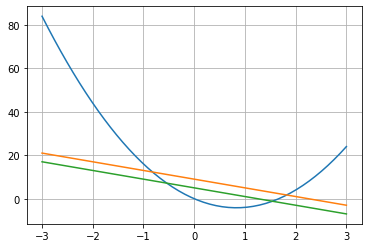

In [3]:
x = np.linspace(-3, 3)
y = np.linspace(-3, 3)
z = np.linspace(-3, 3)

def func(x, y, z):
  return 2*(x**3) + 5*(x**2)*z - z*(y**2) + 3*x*y - 2*(z**2) + 3*x*y*z

# 미분함수 정의 x로 미분
def grad_x(x, y, z):
  # h : 1e - 10 == 10**-10
  return (func(x+1e-10, y, z) - func(x, y, z))/1e-10
# 미분함수 정의 y로 미분
def grad_y(x, y, z):
  return (func(x, y+1e-10, z) - func(x, y, z))/1e-10
# 미분함수 정의 z로 미분
def grad_z(x, y, z):
  return (func(x, y, z+1e-10) - func(x, y, z))/1e-10

gradx = grad_x(x, 2, -1)
grady = grad_y(1, y, 2)
gradz = grad_z(-1, 0, z)

# 함수 출력
plt.plot(x, gradx)
plt.grid()

plt.plot(y, grady)
plt.grid()

plt.plot(z, gradz)
plt.grid()

## 경사하강법 + 확률론적 경사하강법

7.060317662488456


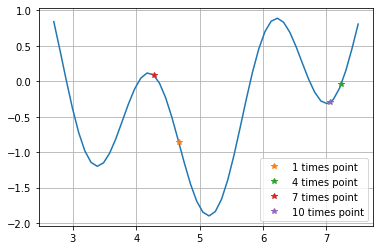

In [23]:
# 함수 정의
def func(x):
  return np.sin(x) + np.sin((10/3)*x)

# x로 미분
def grad_x(x):
  # h : 1e - 10 == 10**-10
  return (func(x+1e-10)-func(x))/1e-10

x = np.linspace(2.7, 7.5)
y = func(x)

# x 초기값이 2.7이고 학습률 alpha가 0.5일때 10번 반복 최소 지점 x?
alpha = 0.5
x_init = 2.7
y_init = func(x_init)
plt.plot(x, y)
for ep in range(10):
  x_init -= alpha*grad_x(x_init)
  if ep % 3 == 0:
    plt.plot(x_init, func(x_init), '*',label ='{:d} times point'.format(ep+1))
#plt.plot(x_init, y_init, 'g*', label = 'Minimum point')
plt.legend()
plt.grid()

print(x_init)

5.145736036758637


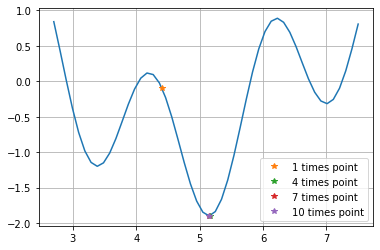

In [20]:
# x 초기값이 4.3이고 학습률 alpha가 0.1일때 10번 반복 최소 지점 x?
alpha = 0.1
x_init = 4.3
y_init = func(x_init)
plt.plot(x, y)
#plt.plot(x_init, y_init, 'r*', label = 'start point')
for ep in range(10):
  x_init -= alpha*grad_x(x_init)
  if ep % 3 == 0:
    plt.plot(x_init, func(x_init), '*',label ='{:d} times point'.format(ep+1))
#plt.plot(x_init, y_init, 'g*', label = 'Minimum point')
plt.legend()
plt.grid()

print(x_init)

In [24]:
# 평균값 mean을 통한 경사하강법 평균값 mean을 통한 경사하강법
def func(x):
  return x**2

  def grad_x(x):
    return (func(x+1e-10)-func(x))/1e-10

    x_init = np.array([3.68, 3.57, 3.46])

    for i in range(50):
    
def func(x):
  return x**2

def grad_x(x):
  return (func(x+1e-10)-func(x))/1e-10

x_init = np.array([3.68, 3.57, 3.46])

for i in range(50):
  x_init -= 0.1 * np.mean(grad_x(x_init))

print(x_init)

[ 1.10050951e-01  5.09514851e-05 -1.09949049e-01]
